# Taking Derivatives with Vandermonde Matrices

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

Here are a few functions:

In [205]:
if 1:
    def f(x):
        return np.sin(5*x)
    def df(x):
        return 5*np.cos(5*x)
elif 0:
    gamma = 0.15
    def f(x):
        return np.sin(1/(gamma+x))
    def df(x):
        return -np.cos(1/(gamma+x))/(gamma+x)**2
else:
    def f(x):
        return np.abs(x-0.5)
    def df(x):
        # Well...
        return -1 + 2*(x<=0.5).astype(np.float)

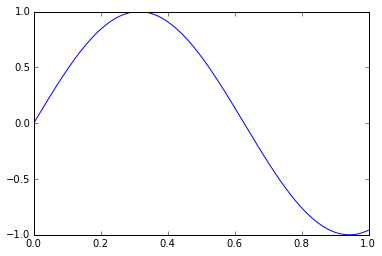

In [206]:
x_01 = np.linspace(0, 1, 1000)
pt.plot(x_01, f(x_01))

In [246]:
degree = 4
h = 1

nodes = 0.5 + np.linspace(-h/2, h/2, degree+1)
nodes

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

Build the gen. Vandermonde matrix and find the coefficients:

In [247]:
V = np.array([
    nodes**i
    for i in range(degree+1)
]).T

In [256]:
coeffs = la.solve(V, f(nodes))

Evaluate the interpolant:

In [249]:
x_0h = 0.5+np.linspace(-h/2, h/2, 1000)

In [250]:
interp_0h = 0*x_0h
for i in range(degree+1):
    interp_0h += coeffs[i] * x_0h**i

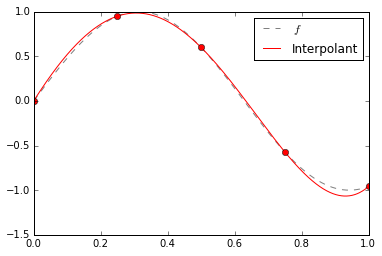

In [251]:
pt.plot(x_01, f(x_01), "--", color="gray", label="$f$")
pt.plot(x_0h, interp_0h, color="red", label="Interpolant")
pt.plot(nodes, f(nodes), "or")
pt.legend(loc="best")

Now build the gen. Vandermonde matrix $V'=$`Vprime` of the derivatives:

In [252]:
def monomial_deriv(i, x):
    if i == 0:
        return 0*x
    else:
        return i*nodes**(i-1)

Vprime = np.array([
    monomial_deriv(i, nodes)
    for i in range(degree+1)
]).T

Compute the value of the derivative at the nodes as `fderiv`:

In [257]:
fderiv = Vprime.dot(la.inv(V)).dot(f(nodes))

And plot vs `df`, the exact derivative:

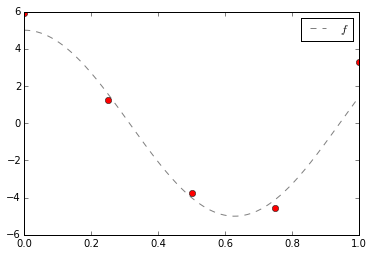

In [258]:
pt.plot(x_01, df(x_01), "--", color="gray", label="$f$")
pt.plot(nodes, fderiv, "or")
pt.legend(loc="best")

* Why don't we hit the values of the derivative exactly?
* Do an accuracy study.

In [255]:
print(np.max(np.abs(df(nodes) - fderiv)))

1.85604897639
